<a href="https://colab.research.google.com/github/lavigne12/baseballstats/blob/main/Final_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!pip install pyspark_dist_explore

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=ef1fbe61d7e3b68d3827ddc131091bf77a33ec9a545d938ae3e1cc4bf22d9730
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected packag

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import numpy as np
from pyspark.sql.functions import desc
from pyspark.sql.functions import hour, minute, concat, lit
from pyspark.sql.functions import substring, expr, regexp_replace
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.types import FloatType
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import DataFrame
from functools import reduce
import pandas as pd
import seaborn as sns
from pyspark.ml.stat import Correlation
from pyspark.ml.regression import GBTRegressor



In [ ]:
#from pyspark.sql.types
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Final").getOrCreate()



In [ ]:
from google.colab import files

# Upload your CSV file
uploaded = files.upload()

Saving 2023 Team by Team Attend Stats.csv to 2023 Team by Team Attend Stats.csv
Saving HistoricalAttendanceDataMLB.csv to HistoricalAttendanceDataMLB.csv
Saving Total Team by Team Attend Stats.csv to Total Team by Team Attend Stats (1).csv


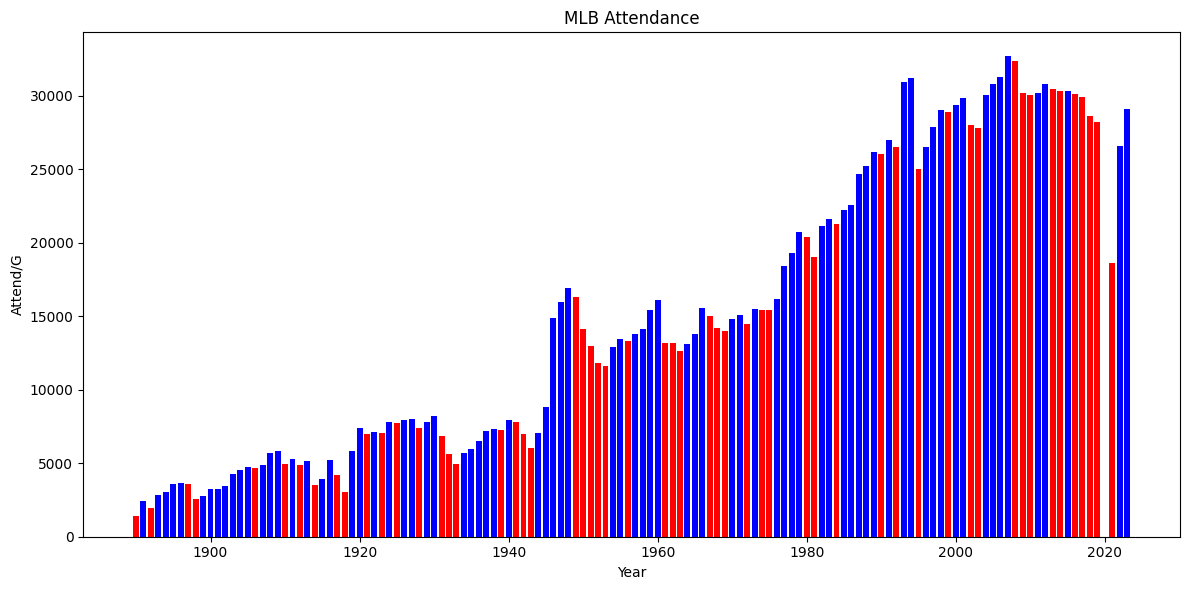

In [ ]:
data = spark.read.csv("HistoricalAttendanceDataMLB.csv", header=True, inferSchema=True)

average_attendance = "Attend/G"
year = "Year"

selected_data = data.select(average_attendance, year).filter(col(average_attendance).isNotNull() & col(year).isNotNull())

pandas_data = selected_data.toPandas()
pandas_data[average_attendance] = pandas_data[average_attendance].str.replace(',', '').astype(float)

#Plot attendnace per year
plt.figure(figsize=(12, 6))
plt.bar(pandas_data[year], pandas_data[average_attendance])
color_map = ['b' if pandas_data[average_attendance][i] > pandas_data[average_attendance][i + 1] else 'r' for i in range(len(pandas_data) - 1)]
color_map.append('r')
plt.bar(pandas_data[year], pandas_data[average_attendance], color=color_map)
plt.xlabel("Year")
plt.ylabel('Attend/G')
plt.title("MLB Attendance")
plt.tight_layout()
plt.show()

In [ ]:
data

NameError: ignored

In [ ]:
df=spark.read \
 .option("header","True")\
 .option("inferSchema","True")\
 .option("sep",",")\
 .csv("Total Team by Team Attend Stats.csv")
print("There are",df.count(),"rows",len(df.columns),
      "columns" ,"in the data.")

There are 270 rows 42 columns in the data.


In [ ]:
mlb_stats = 'Total Team by Team Attend Stats.csv'


df_mlb_stats = spark.read.csv(mlb_stats, header=True, inferSchema=True)


df_mlb_stats.show()


+--------------------+----------+--------+-------+----+---+---+----+----+-------+-------------+-------------------+--------------------+----+--------+----+---+----+----+---+----+---+---+---+---+---+---+---+----+-----+-----+-----+-----+----+----+---+---+---+---+---+----+----+
|                  Tm|Attendance|Attend/G|BatAge3|PAge|BPF|PPF|#HOF|#A-S|#a-tA-S| Est. Payroll|               Time|            Managers|#Bat|BatAge14| R/G|  G|  PA|  AB|  R|   H| 2B| 3B| HR|RBI| SB| CS| BB|  SO|   BA|  OBP|  SLG|  OPS|OPS+|  TB|GDP|HBP| SH| SF|IBB| LOB|Year|
+--------------------+----------+--------+-------+----+---+---+----+----+-------+-------------+-------------------+--------------------+----+--------+----+---+----+----+---+----+---+---+---+---+---+---+---+----+-----+-----+-----+-----+----+----+---+---+---+---+---+----+----+
|Arizona Diamondbacks| 2,177,617|  26,884|   28.3|27.4|103|103|   0|   1|     13| $67,069,833 |2023-08-19 02:58:00|              Gibson|  48|    28.3|4.53|162|6150|5462|734

In [ ]:
df_mlb_stats.printSchema()

root
 |-- Tm: string (nullable = true)
 |-- Attendance: string (nullable = true)
 |-- Attend/G: string (nullable = true)
 |-- BatAge3: double (nullable = true)
 |-- PAge: double (nullable = true)
 |-- BPF: integer (nullable = true)
 |-- PPF: integer (nullable = true)
 |-- #HOF: integer (nullable = true)
 |-- #A-S: integer (nullable = true)
 |-- #a-tA-S: integer (nullable = true)
 |-- Est. Payroll: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Managers: string (nullable = true)
 |-- #Bat: integer (nullable = true)
 |-- BatAge14: double (nullable = true)
 |-- R/G: double (nullable = true)
 |-- G: integer (nullable = true)
 |-- PA: integer (nullable = true)
 |-- AB: integer (nullable = true)
 |-- R: integer (nullable = true)
 |-- H: integer (nullable = true)
 |-- 2B: integer (nullable = true)
 |-- 3B: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- RBI: integer (nullable = true)
 |-- SB: integer (nullable = true)
 |-- CS: integer (nullable = true)


In [ ]:
mlb_stats = 'Total Team by Team Attend Stats.csv'


df_mlb_stats = spark.read.csv(mlb_stats, header=True, inferSchema=True)


df_mlb_stats = df_mlb_stats.withColumn("Time", substring("Time",13,17)) #Get rid of timestamp and only show game time
df_mlb_stats = df_mlb_stats.withColumn("Hour",substring("Time",1,2)) # Make a new column for hours
df_mlb_stats = df_mlb_stats.withColumn("Hour", regexp_replace(col("Hour"), ":", "")) #Get rid of colon
df_mlb_stats = df_mlb_stats.withColumn("Minute",substring("Time",2,3)) #Make a new column for minutes
df_mlb_stats = df_mlb_stats.withColumn("Minute", regexp_replace(col("Minute"), ":", "")) #Get rid of colon
df_mlb_stats = df_mlb_stats.withColumn("TimeInMinutes", expr("Hour * 60 + Minute").cast("int")) #Convert time into minutes and create new column
df_mlb_stats = df_mlb_stats.withColumn("Minute", regexp_replace(col("Minute"), ":", "")) #Get rid of colon
df_mlb_stats = df_mlb_stats.withColumnRenamed("Est. Payroll", "Payroll") #rename payroll column
df_mlb_stats = df_mlb_stats.withColumn("Payroll", regexp_replace(col("Payroll"), "\\$", "")) #Get rid of dollar sign
df_mlb_stats = df_mlb_stats.withColumn("Payroll", regexp_replace(col("Payroll"), ",", "")) #Get rid of comma
df_mlb_stats = df_mlb_stats.withColumn("Payroll", col("Payroll").cast("int"))
df_mlb_stats = df_mlb_stats.withColumn("Attendance", regexp_replace(col("Attendance"), ",", "")) #Get rid of comma
df_mlb_stats = df_mlb_stats.withColumn("Attendance", col("Attendance").cast("int"))
df_mlb_stats = df_mlb_stats.withColumn("Attend/G", regexp_replace(col("Attend/G"), ",", "")) #Get rid of comma
df_mlb_stats = df_mlb_stats.withColumn("Attend/G", col("Attend/G").cast("int"))


df_mlb_stats.show()


+--------------------+----------+--------+-------+----+---+---+----+----+-------+---------+-------+--------------------+----+--------+----+---+----+----+---+----+---+---+---+---+---+---+---+----+-----+-----+-----+-----+----+----+---+---+---+---+---+----+----+----+------+-------------+
|                  Tm|Attendance|Attend/G|BatAge3|PAge|BPF|PPF|#HOF|#A-S|#a-tA-S|  Payroll|   Time|            Managers|#Bat|BatAge14| R/G|  G|  PA|  AB|  R|   H| 2B| 3B| HR|RBI| SB| CS| BB|  SO|   BA|  OBP|  SLG|  OPS|OPS+|  TB|GDP|HBP| SH| SF|IBB| LOB|Year|Hour|Minute|TimeInMinutes|
+--------------------+----------+--------+-------+----+---+---+----+----+-------+---------+-------+--------------------+----+--------+----+---+----+----+---+----+---+---+---+---+---+---+---+----+-----+-----+-----+-----+----+----+---+---+---+---+---+----+----+----+------+-------------+
|Arizona Diamondbacks|   2177617|   26884|   28.3|27.4|103|103|   0|   1|     13| 67069833|2:58:00|              Gibson|  48|    28.3|4.53|162

In [ ]:
df_mlb_stats.printSchema()

root
 |-- Tm: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Attend/G: integer (nullable = true)
 |-- BatAge3: double (nullable = true)
 |-- PAge: double (nullable = true)
 |-- BPF: integer (nullable = true)
 |-- PPF: integer (nullable = true)
 |-- #HOF: integer (nullable = true)
 |-- #A-S: integer (nullable = true)
 |-- #a-tA-S: integer (nullable = true)
 |-- Payroll: integer (nullable = true)
 |-- Time: string (nullable = true)
 |-- Managers: string (nullable = true)
 |-- #Bat: integer (nullable = true)
 |-- BatAge14: double (nullable = true)
 |-- R/G: double (nullable = true)
 |-- G: integer (nullable = true)
 |-- PA: integer (nullable = true)
 |-- AB: integer (nullable = true)
 |-- R: integer (nullable = true)
 |-- H: integer (nullable = true)
 |-- 2B: integer (nullable = true)
 |-- 3B: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- RBI: integer (nullable = true)
 |-- SB: integer (nullable = true)
 |-- CS: integer (nullable = true)
 |-- 

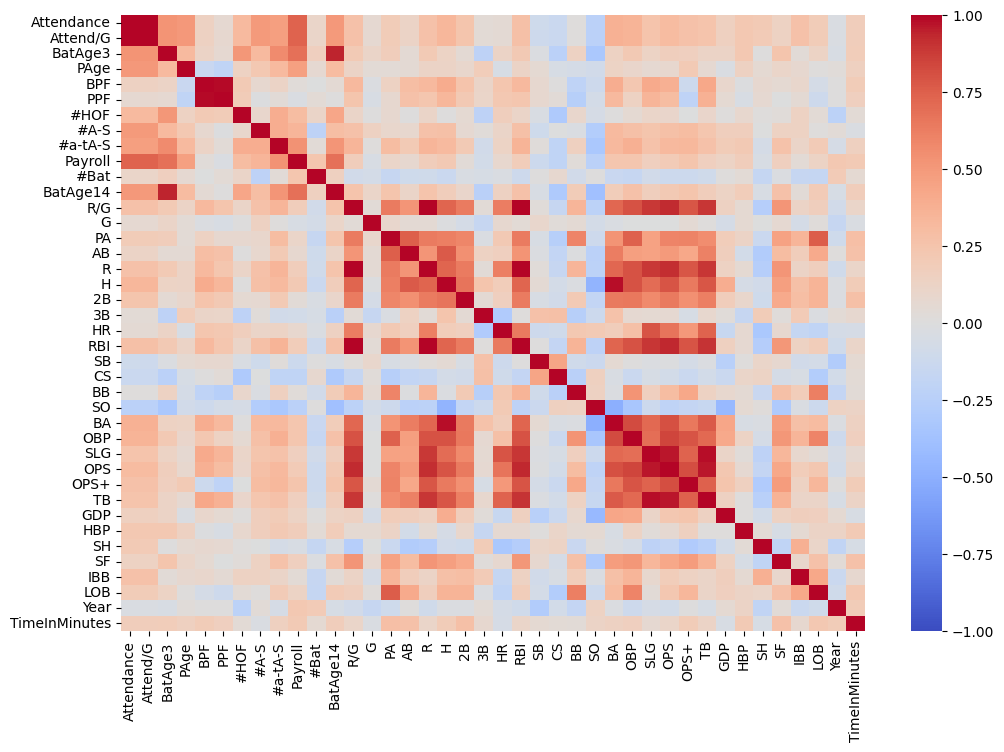

In [ ]:
numeric_columns = [col_name for col_name, col_type in df_mlb_stats.dtypes if col_type in ['int', 'double']]

df_mlb_stats = df_mlb_stats.dropna()
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = assembler.transform(df_mlb_stats)

correlation_matrix = Correlation.corr(df_assembled, "features").collect()[0][0]

correlation_df = pd.DataFrame(correlation_matrix.toArray(), columns=numeric_columns, index=numeric_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

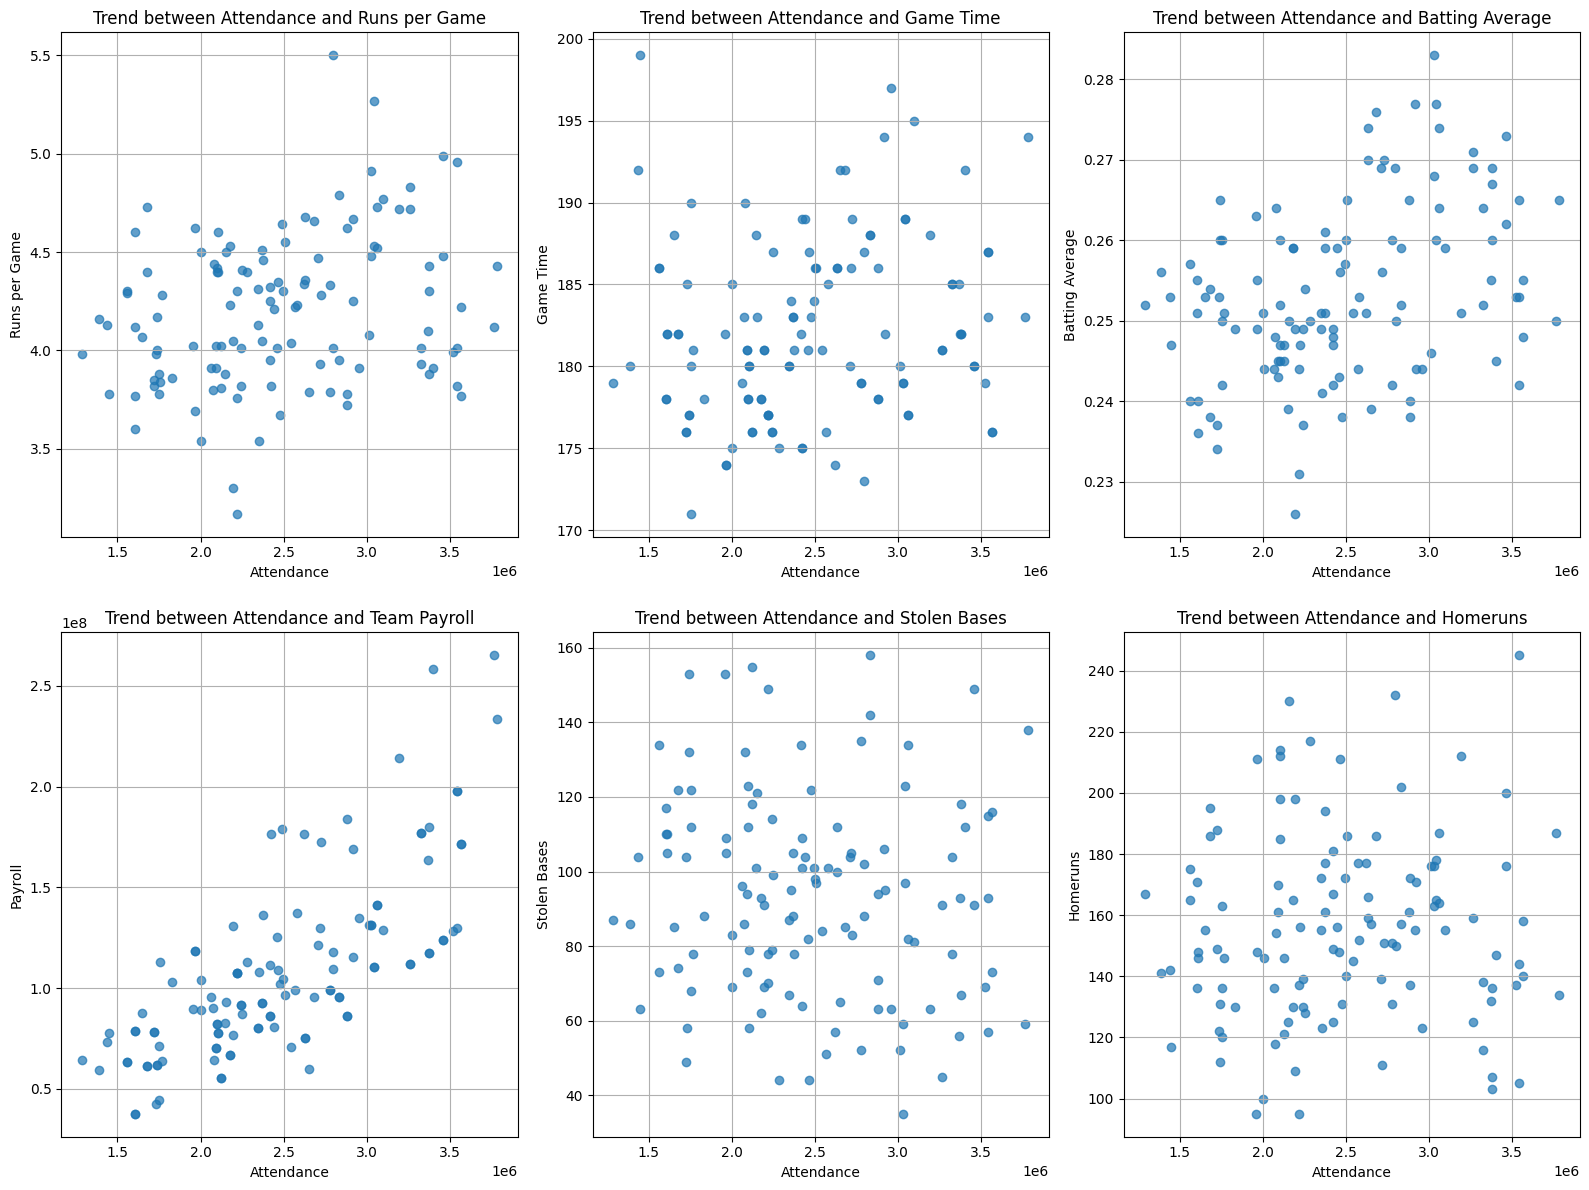

In [ ]:
mlb_stats_pandas = df_mlb_stats.toPandas()

# Create a 2x2 matrix of subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

axs[0, 0].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['R/G'], alpha=0.7)
axs[0, 0].set_title('Trend between Attendance and Runs per Game')
axs[0, 0].set_xlabel('Attendance')
axs[0, 0].set_ylabel('Runs per Game')
axs[0, 0].grid(True)


axs[0, 1].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['TimeInMinutes'], alpha=0.7)
axs[0, 1].set_title('Trend between Attendance and Game Time')
axs[0, 1].set_xlabel('Attendance')
axs[0, 1].set_ylabel('Game Time')
axs[0, 1].grid(True)

axs[0, 2].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['BA'], alpha=0.7)
axs[0, 2].set_title('Trend between Attendance and Batting Average')
axs[0, 2].set_xlabel('Attendance')
axs[0, 2].set_ylabel('Batting Average')
axs[0, 2].grid(True)

axs[1, 0].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['Payroll'], alpha=0.7)
axs[1, 0].set_title('Trend between Attendance and Team Payroll')
axs[1, 0].set_xlabel('Attendance')
axs[1, 0].set_ylabel('Payroll')
axs[1, 0].grid(True)

axs[1, 1].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['SB'], alpha=0.7)
axs[1, 1].set_title('Trend between Attendance and Stolen Bases')
axs[1, 1].set_xlabel('Attendance')
axs[1, 1].set_ylabel('Stolen Bases')
axs[1, 1].grid(True)

axs[1, 2].scatter(mlb_stats_pandas['Attendance'], mlb_stats_pandas['HR'], alpha=0.7)
axs[1, 2].set_title('Trend between Attendance and Homeruns')
axs[1, 2].set_xlabel('Attendance')
axs[1, 2].set_ylabel('Homeruns')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Selecting data for regression
selected_cols = ['Attendance','Payroll', 'R/G','H','HR','SB','BA', 'TimeInMinutes']
data = df_mlb_stats.select(selected_cols)


feature_columns = selected_cols[1:]  #exclude attendance
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)


train_data, test_data = data.randomSplit([0.4, 0.6], seed=42)


mlb_linearregression = LinearRegression(featuresCol='features', labelCol='Attendance', predictionCol='predicted_attendance')


mlb_linearregression_model = mlb_linearregression.fit(train_data)


predictions = mlb_linearregression_model.transform(test_data)


predictions.select('Attendance', 'predicted_attendance').show()

# Calculate R-squared and RMSE
evaluator = RegressionEvaluator(labelCol='Attendance', predictionCol='predicted_attendance', metricName='r2')
r2 = evaluator.evaluate(predictions)
print("R-squared: {:.3f}".format(r2))

rmse_evaluator = RegressionEvaluator(labelCol='Attendance', predictionCol='predicted_attendance', metricName='rmse')
rmse = rmse_evaluator.evaluate(predictions)
print("RMSE: {:.3f}".format(rmse))

+----------+--------------------+
|Attendance|predicted_attendance|
+----------+--------------------+
|   1287054|    2145911.91028135|
|   1388905|  1990281.1880356013|
|   1437393|  2246030.4793222724|
|   1559681|  2106508.1962086055|
|   1559681|  1857847.5274553152|
|   1603596|  2310831.3413277846|
|   1607733|  1731938.7185467891|
|   1607733|  1802967.2519921893|
|   1650821|   2313873.239981236|
|   1679013|  2095636.6835583914|
|   1721920|  2234504.8704301203|
|   1721920|  2323514.4579409696|
|   1732283|  1907362.2811224754|
|   1739859|  2487347.8012989005|
|   1752235|  2291336.6210671477|
|   1755810|  2562252.0671557277|
|   1768175|   2246018.272189535|
|   1831080|   2503288.687601544|
|   1956482|  2499704.6792165777|
|   1965955|  2810523.6703992044|
+----------+--------------------+
only showing top 20 rows

R-squared: 0.496
RMSE: 447216.942


In [ ]:
summary = mlb_linearregression_model.summary

#Create list
coefficient_info = []

#Calculate confidence intervals
for i in range(num_features):
    coeff_name = feature_names[i]
    coeff_value = coefficients[i]
    std_error = coefficients_std_errors[i]
    lower_bound = coeff_value - 1.96 * std_error
    upper_bound = coeff_value + 1.96 * std_error

    coefficient_info.append((coeff_name, coeff_value, lower_bound, upper_bound))


print("{:<15} {:<15} {:<15} {:<15}".format("Coefficient", "Estimate", "Lower CI", "Upper CI"))


for coeff_info in coefficient_info:
    coeff_name, coeff_value, lower_bound, upper_bound = coeff_info
    print("{:<15} {:<15.6f} {:<15.6f} {:<15.6f}".format(coeff_name, coeff_value, lower_bound, upper_bound))


Coefficient     Estimate        Lower CI        Upper CI       
Payroll         0.009318        0.006922        0.011714       
R/G             198152.342909   -301729.891657  698034.577474  
H               -1108.898091    -8031.168468    5813.372286    
HR              -2867.816422    -7564.246920    1828.614075    
SB              24.234435       -3504.842845    3553.311715    
BA              16388012.917296 -30931321.267232 63707347.101825
TimeInMinutes   -4164.280577    -22973.417625   14644.856471   
